### Clustering Method Exploration: Analyzing Relationships Between Interviewed and Non-interviewed Customers

#### Project Overview
In this solo data science project, I explore clustering methods using a dataset of 200 customers, where 10 have undergone in-depth discovery interviews. My aim is to discover patterns and similarities between the interviewed and non-interviewed customers, enhancing my understanding of diverse customer needs.

#### Objectives
- **Uncover Similarities:** Utilizing clustering algorithms to unearth patterns in customer behavior and preferences.
- **Extrapolate Interview Insights:** Applying insights from the interviews to gain a deeper understanding of the entire customer base, on an individual basis.
- **Enhance Personal Learning:** This project serves as a means to improve my skills in delivering data-driven insights, focusing on customers who have not been interviewed.

#### Approach
The project involves a detailed analysis of customer data, using clustering techniques to categorize customers based on various attributes. This individual exploration aims to reveal how non-interviewed customers resemble those interviewed, enhancing my personal understanding and application of data science methods.

#### Data Source
The data, sourced from [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/customer-data), encompasses 200 data points with features such as:
- **CustomerID:** IDs ranging from 1 to 200.
- **Gender:** Includes 56% Female and 44% Male customers.
- **Age:** Customer ages between 18 and 70 years.
- **Annual Income:** Ranging from $15,000 to $137,000.
- **Spending Score:** Scores between 1 and 99, indicating purchasing behavior.

This project is a personal venture to delve into data science methodologies, focusing on clustering techniques.


In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances 


# Set seed
np.random.seed(42)

# Import data
data_path = 'data/Mall_Customers.csv'
data = pd.read_csv(data_path)

In [2]:
# Format and Clean Data
data = data.drop(columns=['CustomerID'])
data = data.rename(columns={'Genre': 'Gender'})
data.columns = data.columns.str.lower()
data['gender'] = data['gender'].astype('category')

df = data.copy()

In [3]:
# Normalize Data
df[['age', 'annual_income_(k$)', 'spending_score']] = MinMaxScaler().fit_transform(data[['age', 'annual_income_(k$)', 'spending_score']])
df['gender'] = df['gender'].cat.codes

In [4]:
# Calculate Euclidean Distances between all points
df_distances = euclidean_distances(df, df)

In [5]:
# Add distances to dataframe
distance_columns = [f'distance_to_{i}' for i in range(len(df))]
df_distances = pd.DataFrame(df_distances, columns=distance_columns, index=df.index)

# Concatinate distances to original dataframe
df = pd.concat([df, df_distances], axis=1)

In [6]:
# Select 10 random customers as "interviewed" 
interviewed_indices = np.random.choice(df.index, size=10, replace=False)

In [7]:
# Extract distances to interviewed customers
interviewed_distances = df_distances[[f'distance_to_{i}' for i in interviewed_indices]]

In [8]:
# Identify nearest interviewed customer for each non-interviewed customer
nearest_interviewed = interviewed_distances.idxmin(axis=1).value_counts()

/var/folders/0r/6jbjzk0n44n_phz8hy1gvsp80000gn/T/ipykernel_24141/2140481529.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


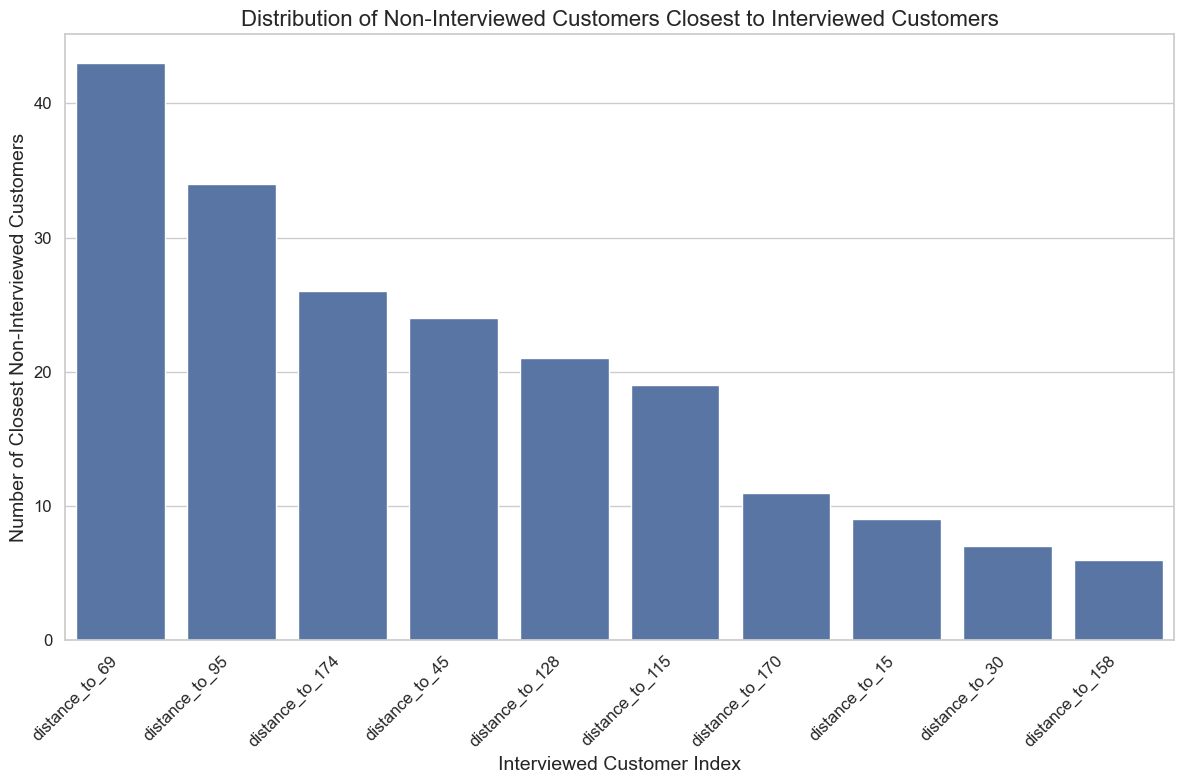

In [10]:
# Create a histogram
sns.set(style="whitegrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Create the barplot
ax = sns.barplot(x=nearest_interviewed.index, y=nearest_interviewed.values)

# Rotate the x-axis labels to prevent overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Optionally adjust the font size of the labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the labels and title
plt.xlabel('Interviewed Customer Index', fontsize=14)
plt.ylabel('Number of Closest Non-Interviewed Customers', fontsize=14)
plt.title('Distribution of Non-Interviewed Customers Closest to Interviewed Customers', fontsize=16)

# Show the plot with adjusted labels
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()